# K-Fold

## File explaining what led us to use K-Fold Cross Validation on our models

In [33]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import StratifiedGroupKFold
sb.set()
b = pd.read_csv('data 2.csv')
b = b.drop(columns=['id', 'Unnamed: 32'])
b['diagnosis'] = b['diagnosis'].replace(["M", "B"], [1, 0])


In [34]:
## Finding MSE and R2 of train and test 


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X = b.drop('diagnosis', axis=1)  
y = b['diagnosis']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler 
X_test_scaled = scaler.transform(X_test)
# Train the model using the scaled training set
model = LinearRegression() 
model.fit(X_train_scaled, y_train)

# Make predictions using the scaled training set and testing set
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and R2 score for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R2:", train_r2)
print("Test R2:", test_r2)



Train MSE: 0.051208582482614416
Test MSE: 0.06312402317639006
Train R2: 0.7740813879626807
Test R2: 0.7468025292591465


## From this data alone of MSE and R2, it is not possible to tell whether our data is overfitting or not, hence we did further analysis

In [41]:
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler 
X_test_scaled = scaler.transform(X_test)

# Train the model using logistic regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# Calculate the accuracy on the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy on the training and test sets
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Define the number of folds for k-fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=69, shuffle=True)

accuracy_scores = []

# Perform k-fold cross-validation and calculate the accuracy scores
for train_index, test_index in kf.split(X_train_scaled):
    X_train_kf, X_test_kf = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]


    # Train the model using logistic regression
    logreg.fit(X_train_kf, y_train_kf)

    # Make predictions on the test set
    y_pred_kf = logreg.predict(X_test_kf)

    # Calculate the accuracy score
    accuracy_kf = accuracy_score(y_test_kf, y_pred_kf)

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy_kf)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)

# Calculate the average accuracy score
average_accuracy = np.mean(accuracy_scores)

# Print the average accuracy score
print("Average accuracy score:", average_accuracy)

# Check for overfitting by comparing the accuracy on the training set to the average accuracy from k-fold cross-validation
if train_accuracy > average_accuracy:
    print("Overfitting detected")
else:
    print("No overfitting detected")

Train Accuracy: 0.989010989010989
Test Accuracy: 0.9473684210526315
Accuracy scores for each fold: [0.9782608695652174, 1.0, 0.9347826086956522, 0.9565217391304348, 0.9782608695652174, 0.9555555555555556, 0.9555555555555556, 1.0, 0.9777777777777777, 1.0]
Average accuracy score: 0.9736714975845411
Overfitting detected


## This above code applies K-Fold and checks for overfitting, overfitting is detected in this case. It detects overfitting by comparing the accuracy of the model on the training set to the average accuracy obtained from k-fold cross validation


## As such, we have decided that using a K-Fold cross validation for our models later on would be best in this case, to prevent possible overfitting of data points and to also address the limitations of our limited data set

In [42]:
## the codes from here onwords will explain what K-Fold is 

## K-Fold Cross Validation

###  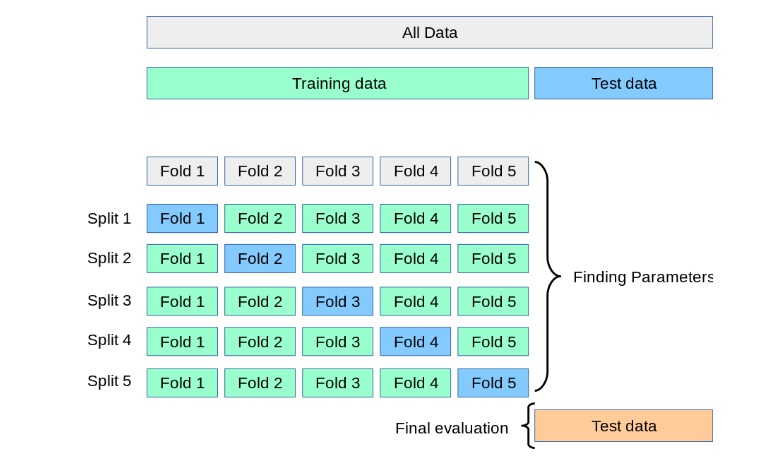



K-fold cross-validation is a resampling technique used to evaluate the performance of machine learning models. It provides us with a more reliable estimate of a model's performance than simply splitting the data into a single train-test set. The main idea behind k-fold cross-validation is to divide the dataset into 'k' smaller, equally sized subsets or 'folds'. The model is then trained and evaluated 'k' times, each time using a different fold as the test set and the remaining 'k-1' folds as the training set.

The steps involved in k-fold cross-validation are as follows:

1. Divide the dataset into 'k' equally sized folds.
2. For each fold (from 1 to k):
   a. Set the current fold as the test set and the remaining 'k-1' folds as the training set.
   b. Train the model using the training set.
   c. Evaluate the model using the test set and record the performance metric (e.g., accuracy, precision, recall, etc.).
3. Calculate the average of the recorded performance metrics across all 'k' iterations.

By following this procedure, each data point gets to be in the test set exactly once, and in the training set 'k-1' times. The final performance metric is then calculated by averaging the performance metrics obtained during the 'k' iterations. This provides a more robust and reliable estimate of the model's performance, as it reduces the impact of the particular train-test split on the evaluation and helps account for potential biases in the data distribution.

K-fold cross-validation is especially useful in our case when dealing with small datasets, as it can help in mitigating the risk of overfitting and provide a better assessment of our model's generalization ability.

## As such, by using K-Fold we are able to get a more reliable representation of our accuracies

In [37]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA after scaling the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Defining the number of folds for k-fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=69, shuffle=True)

# Initializing the logistic regression model
logreg = LogisticRegression(solver='liblinear')

accuracy_scores = []

# Performing k-fold cross-validation
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Logistic Regression

    # Fitting the model on the training data
    logreg.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = logreg.predict(X_test)

    # Calculating accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Printing the accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)

# Calculating the average accuracy score
average_accuracy = np.mean(accuracy_scores)
print("Average accuracy score:", average_accuracy)



Accuracy scores for each fold: [0.9649122807017544, 0.8771929824561403, 0.9824561403508771, 0.9824561403508771, 0.9473684210526315, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9821428571428571]
Average accuracy score: 0.9526002506265664


## Stratified K-Fold 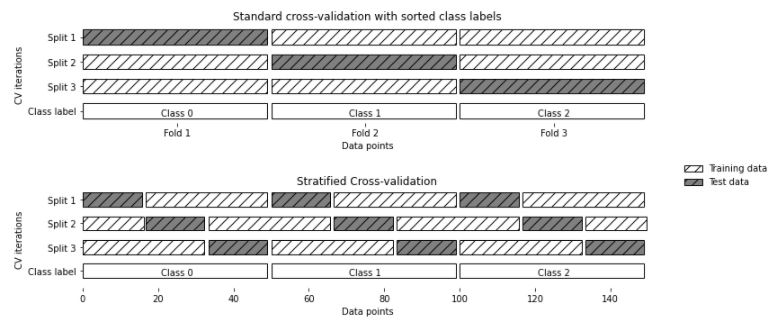

In [38]:
from sklearn.model_selection import StratifiedKFold

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining the number of folds for stratified k-fold cross-validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, random_state=69, shuffle=True)

# Initializing the logistic regression model
logreg = LogisticRegression(solver='liblinear')

accuracy_scores = []

# Performing stratified k-fold cross-validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Logistic Regression

    # Fitting the model on the training data
    logreg.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = logreg.predict(X_test)

    # Calculating accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Printing the accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)

# Calculating the average accuracy score
average_accuracy = np.mean(accuracy_scores)
print("Average accuracy score:", average_accuracy)


Accuracy scores for each fold: [1.0, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 1.0, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9642857142857143]
Average accuracy score: 0.9771303258145363
